In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as py
data = pd.read_csv('/kaggle/input/pishingattack/Website Phishing.csv')
df= pd.DataFrame(data)
print(df)
df.info()
df.describe()

      SFH  popUpWidnow  SSLfinal_State  Request_URL  URL_of_Anchor  \
0       1           -1               1           -1             -1   
1      -1           -1              -1           -1             -1   
2       1           -1               0            0             -1   
3       1            0               1           -1             -1   
4      -1           -1               1           -1              0   
...   ...          ...             ...          ...            ...   
1348   -1           -1              -1           -1             -1   
1349   -1            0               1            0             -1   
1350   -1            0              -1           -1             -1   
1351    0            0               1            0              0   
1352    1            0               1            1              1   

      web_traffic  URL_Length  age_of_domain  having_IP_Address  Result  
0               1           1              1                  0       0  
1          

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,0.114560,-0.113821
std,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.318608,0.954773
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Training - Testing - Validation 

In [6]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
# Assuming your dataset is in a CSV file named 'students_data.cs

# Assuming 'X' is your feature matrix (pandas DataFrame) and 'y' is the corresponding labels
X=df.drop('Result',axis=1)
y=df['Result']
X_np = X.to_numpy()  # Convert DataFrame to NumPy array

# Define the classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Extra Trees': ExtraTreesClassifier(),
    'Naive Bayes': GaussianNB()
}

# Set up k-fold stratified cross-validation
k_folds = 5  # You can adjust the number of folds
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    print(f"Classifier: {clf_name}")
    accuracy_list = []
    classification_reports = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracy_list.append(accuracy)

        classification_reports.append(classification_report(y_test, y_pred))

    # Display average accuracy and classification report
    avg_accuracy = sum(accuracy_list) / k_folds
    print(f"Average Accuracy: {avg_accuracy:.6f}")
    
    print("Average Classification Report:")
    for metric in classification_reports[0].split('\n')[:-1]:
        print(metric)
    print("\n" + "="*50 + "\n")


Classifier: Random Forest
Average Accuracy: 0.882474
Average Classification Report:
              precision    recall  f1-score   support

          -1       0.89      0.91      0.90       140
           0       0.82      0.67      0.74        21
           1       0.85      0.85      0.85       110

    accuracy                           0.87       271
   macro avg       0.85      0.81      0.83       271
weighted avg       0.87      0.87      0.87       271


Classifier: Logistic Regression
Average Accuracy: 0.828520
Average Classification Report:
              precision    recall  f1-score   support

          -1       0.84      0.91      0.87       140
           0       0.25      0.05      0.08        21
           1       0.80      0.84      0.82       110

    accuracy                           0.81       271
   macro avg       0.63      0.60      0.59       271
weighted avg       0.78      0.81      0.79       271


Classifier: Extra Trees
Average Accuracy: 0.882471
Average Cla

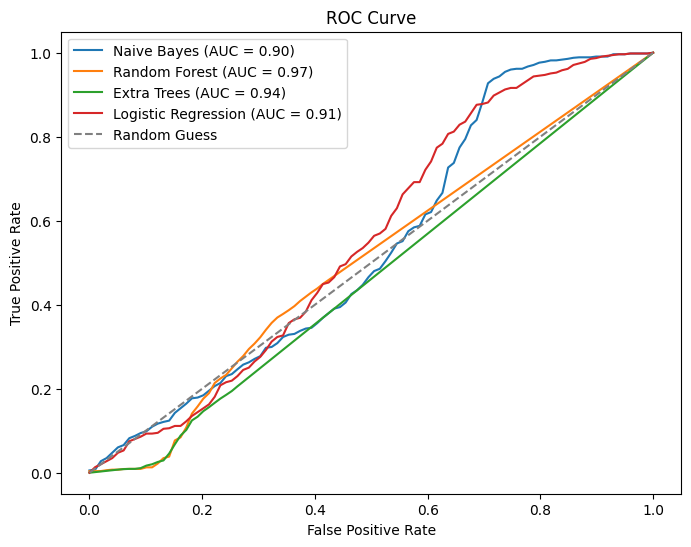

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import numpy as np
# ... (Assuming you have already trained classifiers and calculated predictions)

# Plot ROC curve for each classifier
X_np = X.to_numpy()  # Convert DataFrame to NumPy array

# Set the number of folds
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize classifiers

rf_classifier = RandomForestClassifier()
et_classifier = ExtraTreesClassifier()
lr_classifier = LogisticRegression()
naive_bayes_classifier = GaussianNB(priors=None)

classifiers = {'Naive Bayes': naive_bayes_classifier, 'Random Forest': rf_classifier, 'Extra Trees': et_classifier, 'Logistic Regression': lr_classifier}

# Plot ROC curve for each classifier
plt.figure(figsize=(8, 6))

for clf_name in classifiers:
    all_fpr = np.linspace(0, 1, 100)
    mean_tpr = 0
    mean_auc = 0

    for train_index, test_index in skf.split(X_np, y):
        X_train, X_test = X_np[train_index], X_np[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf = classifiers[clf_name]
        clf.fit(X_train, y_train)

        y_pred_prob = clf.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1], pos_label=1)
        mean_tpr += np.interp(all_fpr, fpr, tpr)
        mean_auc += roc_auc_score(y_test, y_pred_prob, multi_class='ovr')  # One-vs-Rest strategy

    mean_tpr /= num_folds
    mean_auc /= num_folds
    plt.plot(all_fpr, mean_tpr, label=f'{clf_name} (AUC = {mean_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()